<img src= "https://raw.githubusercontent.com/e-sensing/sits/master/inst/extdata/sticker/sits_sticker.png" align="left" width="64"/>
<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/logo-bdc.png" align="right" width="64" />

# <span align="center" style="color:#336699" >Machine Learning for Data Cubes in <b>sits</b></span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/blob/master/jupyter/R/sits/sits-timeseries-classification.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Rolf Simoes<sup><a href="https://orcid.org/0000-0003-0953-4132"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Felipe Souza<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Gilberto Camara<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
    Last Update: September 02, 2022
</div>

<br/>

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%;">
<b>Abstract</b><br>
    <b>sits</b> is an open-source R package for satellite image time series analysis. The package supports the application of machine learning techniques for classification image time series obtained from data cubes.This Jupyter Notebook shows how to work with data cubes in `sits`. This notebook corresponds to the chapter "Machine Learning for Data Cubes" in the <a href="https://e-sensing.github.io/sitsbook/" target="_blank"> book on the SITS package</a>.
</div>    

<br/>
<div style="text-align: justify;  margin-left: 15%; margin-right: 15%;font-size: 100%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>For a comprehensive sits overview and discussion, please, refer to the following gihub book:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Simoes, R; Camara, G.; Souza, F.; Santos, L.; Andrade, P.; Carvalho, A.; Ferreira, K.; Queiroz, G. <a href="https://e-sensing.github.io/sitsbook/" target="_blank">sits: Satellite Image Time Series</a>.
    </div>
</div>

## Setup
<hr style="border:1px solid #0077b9;">

In [1]:
# install sits and sitsdata packages
system("cp -u -R ../input/sits-bundle/sits-bundle/* /usr/local/lib/R/site-library/")

In [2]:
library(sits)
library(sitsdata)

SITS - satellite image time series analysis.

Loaded sits v1.3.0.
        See ?sits for help, citation("sits") for use in publication.
        Documentation avaliable in https://e-sensing.github.io/sitsbook/.

Loaded sitsdata data sets v0.4.4. Use citation("sitsdata") for use in publication.



## Machine learning and deep learning models available on sits
<hr style="border:1px solid #0077b9;">

The following machine learning methods are available in sits:

- Random forests (`sits_rfor()`)
- Support vector machines (`sits_svm()`)
- Extreme gradient boosting (`sits_xgboost()`)
- Multilayer perceptrons (`sits_mlp()`)
- Deep Residual Networks (`sits_resnet()`)
- 1D convolutional neural networks (`sits_tempcnn()`)
- Temporal attention encoders (`sits_tae()`)
- Lightweight temporal attention encoders (`sits_lighttae()`)

## Visualizing Sample Patterns
<hr style="border:1px solid #0077b9;">

In [3]:
options(repr.plot.width = 12, repr.plot.height = 8)

In [4]:
# Estimate the patterns for each class and plot them
mt_patterns <- sits_patterns(samples_matogrosso_mod13q1)

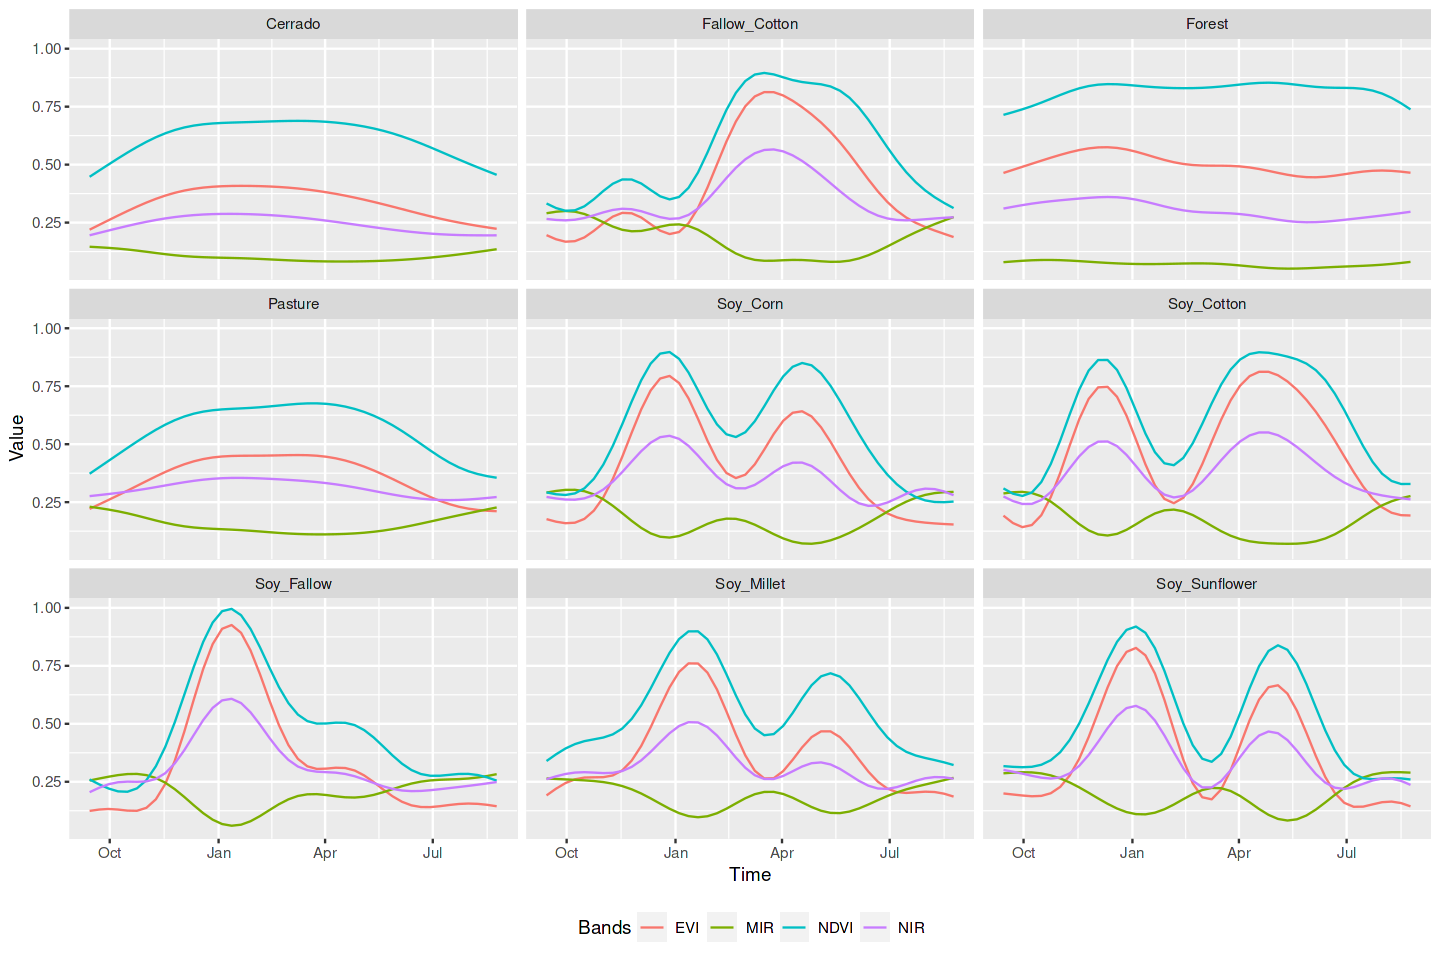

In [5]:
plot(mt_patterns)

## Random forests
<hr style="border:1px solid #0077b9;">

<p text-align="center">
The random forests model uses decision trees as its base model with refinements. When building the decision trees, each time a split in a tree is considered, a random sample of m features is chosen as split candidates from the full set of n features of the samples. Each of these features is then tested; the one maximizing the decrease in a purity measure is used to build the trees. This criterion is used to identify relevant features and to perform variable selection. This decreases the correlation among trees and improves prediction performance. Classification performance depends on the number of trees in the forest as well as the number of features randomly selected at each node.
</p>


<figure>
  <img src="https://e-sensing.github.io/sitsbook/images/random_forest.png" style="display: block; margin-left: auto; margin-right: auto; width: 50%;" />
  <figcaption style="text-align: center;"> Random forests algorithm (source: Venkata Jagannath in Wikipedia - licenced as CC-BY-SA 4.0.)</figcaption>
</figure>

In [6]:
# Train the Mato Grosso samples with Random Forests model.
rfor_model <- sits_train(
  samples   = samples_matogrosso_mod13q1,
  ml_method = sits_rfor(num_trees = 100)
)

In [7]:
options(repr.plot.width = 10, repr.plot.height = 6)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



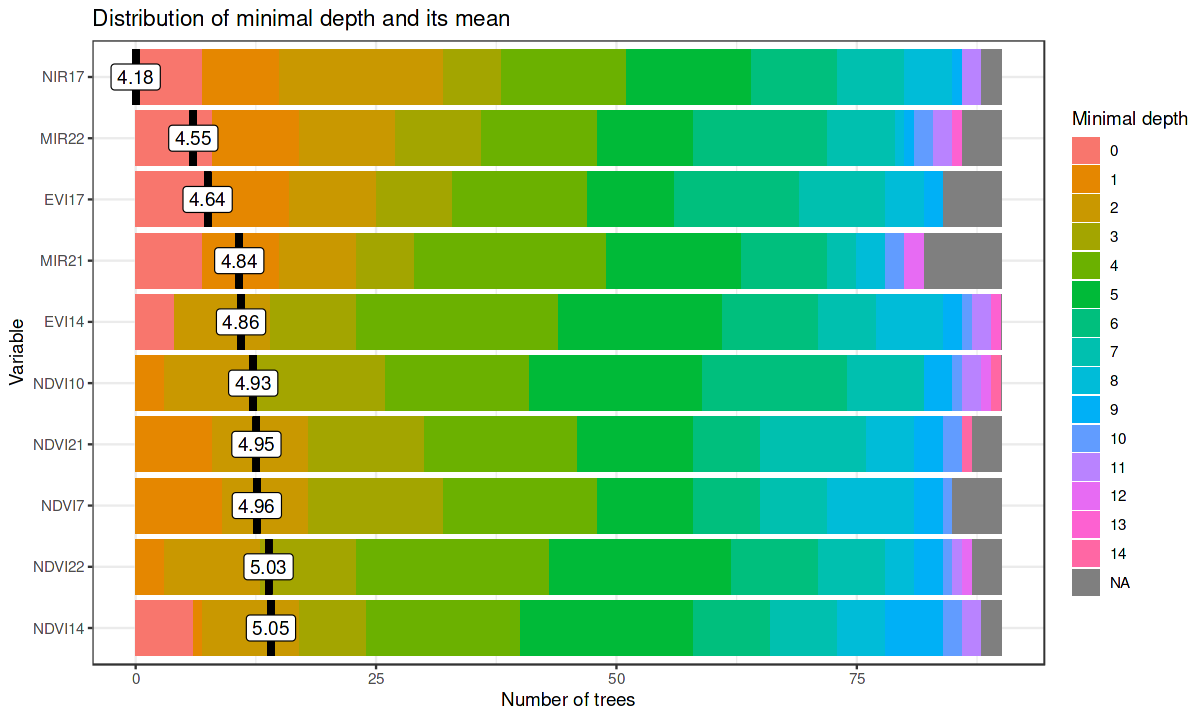

In [8]:
# plot the most important variables of the model
plot(rfor_model)

In [9]:
# Classify using Random Forest model and plot the result
point_class <- sits_classify(
  data     = point_mt_mod13q1,
  ml_model = rfor_model
)

  |======================================================================| 100%


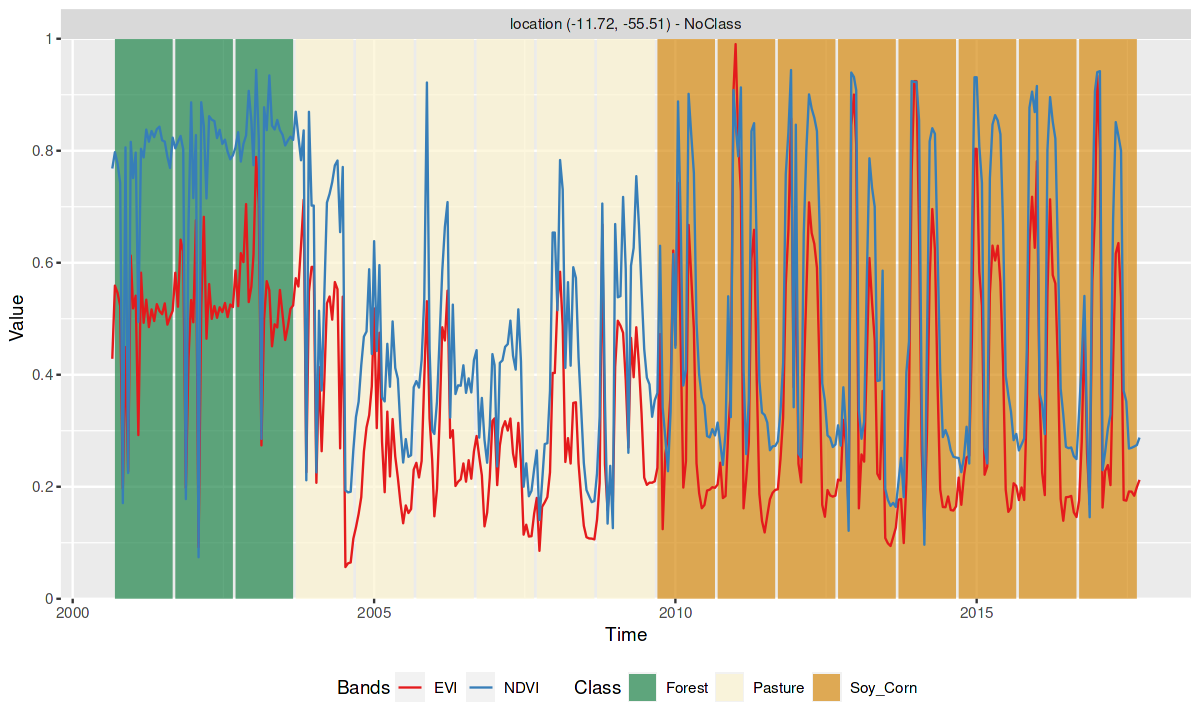

In [10]:
plot(point_class, bands = c("NDVI", "EVI"))

## Temporal Convolutional Neural Network (TempCNN)
<hr style="border:1px solid #0077b9;">

<p text-align="center">
Convolutional neural networks (CNN) are a variety of deep learning methods where a convolution filter (sliding window) is applied to the input data. In the case of time series, a 1D CNN works by applying a moving window to the series. Using convolution filters is a way to incorporate temporal autocorrelation information in the classification. The result of the convolution is another time series. Russwurm and Körner state that the use of 1D-CNN for time series classification improves on the use of multilayer perceptrons, since the classifier is able to represent temporal relationships; also, the convolution window makes the classifier more robust to moderate noise, e.g. intermittent presence of clouds.
</p>


<figure>
  <img src="https://e-sensing.github.io/sitsbook/images/tempcnn.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%;" />
  <figcaption style="text-align: center;">Structure of tempCNN architecture (source: Pelletier et al.(2019))</figcaption>
</figure>

In [11]:
# train using TempCNN
tempcnn_model <- sits_train(
  samples   = samples_matogrosso_mod13q1,
  ml_method = sits_tempcnn(
    optimizer         = torchopt::optim_adamw,
    cnn_layers        = c(128, 128, 128),
    cnn_kernels       = c(7, 7, 7),
    cnn_dropout_rates = c(0.2, 0.2, 0.2),
    epochs            = 20,
    batch_size        = 64,
    validation_split  = 0.2
  )
)

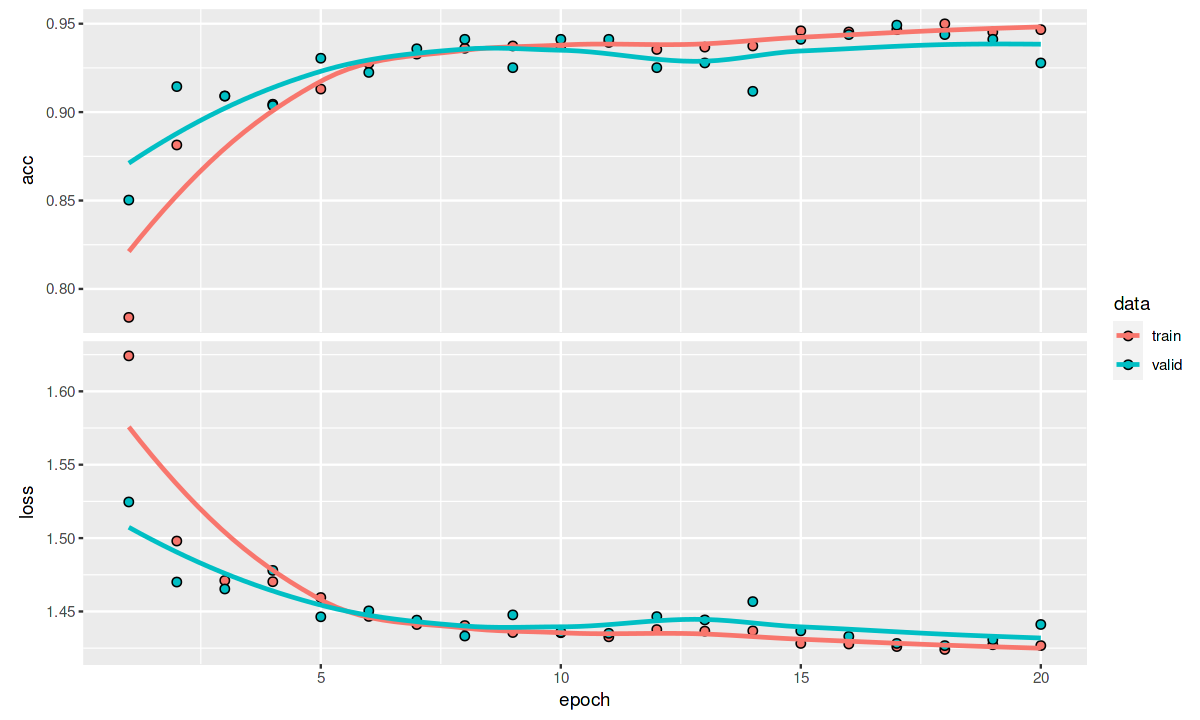

In [12]:
# show training evolution
plot(tempcnn_model)

  |======================================================================| 100%


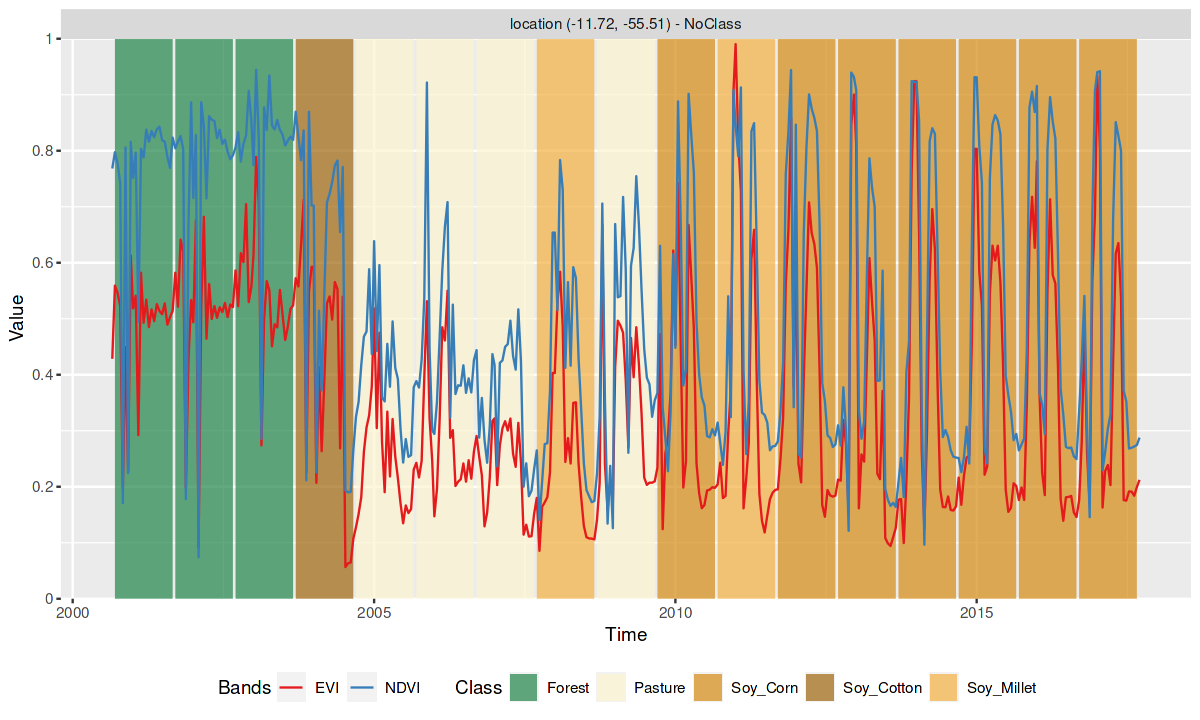

In [13]:
# Classify using TempCNN model and plot the result
point_class <- sits_classify(
    data     = point_mt_mod13q1,
    ml_model = tempcnn_model
)

plot(point_class, bands = c("NDVI", "EVI"))